In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
# qua definiamo lo State, ossia i dati che andranno in input e output all'interno dei grafi
class MyState(TypedDict):
    message: str 

In [3]:
# definiamo qua una funzione che dovrà essere eseguito all'interno del nodo

def saluto(state: MyState) -> MyState:
    """funzione che dice chi sei"""

    state['message'] = f"Sei proprio un grande atleta {state['message']}"

    return state

In [4]:
graph = StateGraph(MyState)

graph.add_node('saluto', saluto)

graph.set_entry_point('saluto')
graph.set_finish_point('saluto')

app = graph.compile()

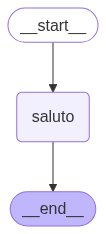

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({'message': 'Roberto'})
result

{'message': 'Sei proprio un grande atleta Roberto'}